In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
heart_df = pd.read_csv("/content/heart_disease_uci.csv")

In [5]:
heart_df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [6]:
print("Exploratory Data Analysis:")
print("Shape of the dataset:", heart_df.shape)
print("First few rows of the dataset:")
print(heart_df.head())
print("Checking for missing values:")
print(heart_df.isnull().sum())

Exploratory Data Analysis:
Shape of the dataset: (920, 16)
First few rows of the dataset:
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2 

In [17]:
numerical_cols = ['age', 'trestbps', 'thalch', 'oldpeak']
target_column = 'chol'


In [18]:
scaler = StandardScaler()
X = scaler.fit_transform(heart_df[numerical_cols])
y = heart_df[target_column]

In [11]:
print("Available columns in the dataset:")
print(heart_df.columns)


Available columns in the dataset:
Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [23]:
numerical_cols = ['age', 'trestbps', 'thalch', 'oldpeak']  # Adjust columns here if needed
target_column = 'chol'  # Ensure the target column exists

In [24]:
missing_cols = [col for col in numerical_cols + [target_column] if col not in heart_df.columns]
if missing_cols:
    print(f"Columns missing from the dataset: {missing_cols}")
else:
    # Data preprocessing - Scaling the features
    scaler = StandardScaler()
    X = scaler.fit_transform(heart_df[numerical_cols])
    y = heart_df[target_column]


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred = model.predict(X_test)

In [44]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) # Removed extra space before this line
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Squared Error: 11636.3166
R^2 Score: 0.0154


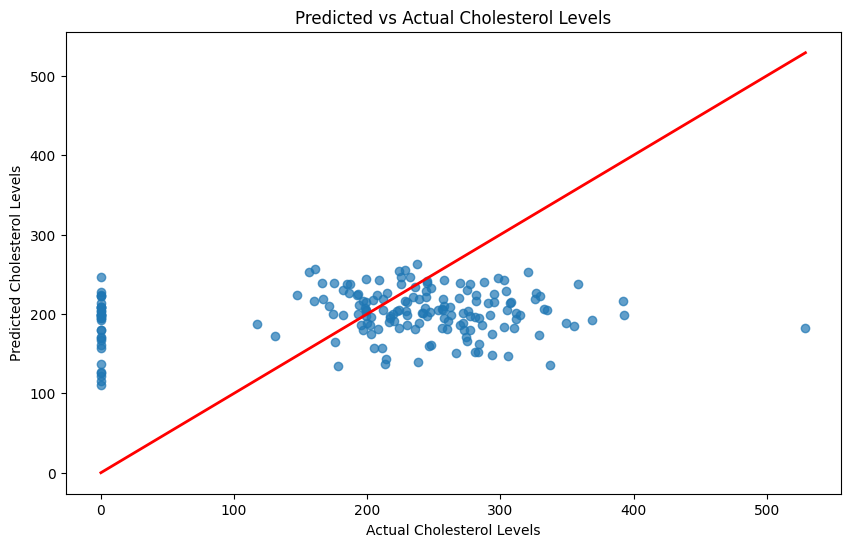

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Predicted vs Actual Cholesterol Levels')
plt.xlabel('Actual Cholesterol Levels')
plt.ylabel('Predicted Cholesterol Levels')
plt.show()


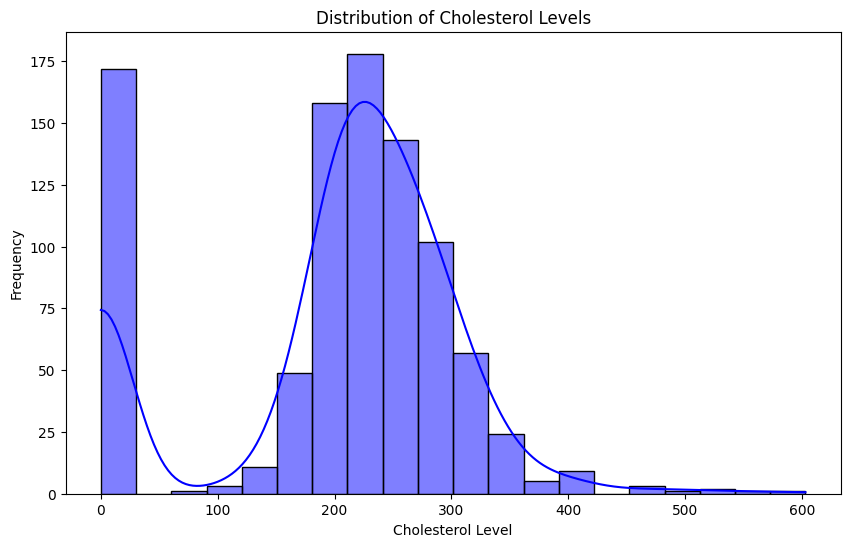

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(heart_df['chol'], kde=True, bins=20, color='blue')
plt.title('Distribution of Cholesterol Levels')
plt.xlabel('Cholesterol Level')
plt.ylabel('Frequency')
plt.show()

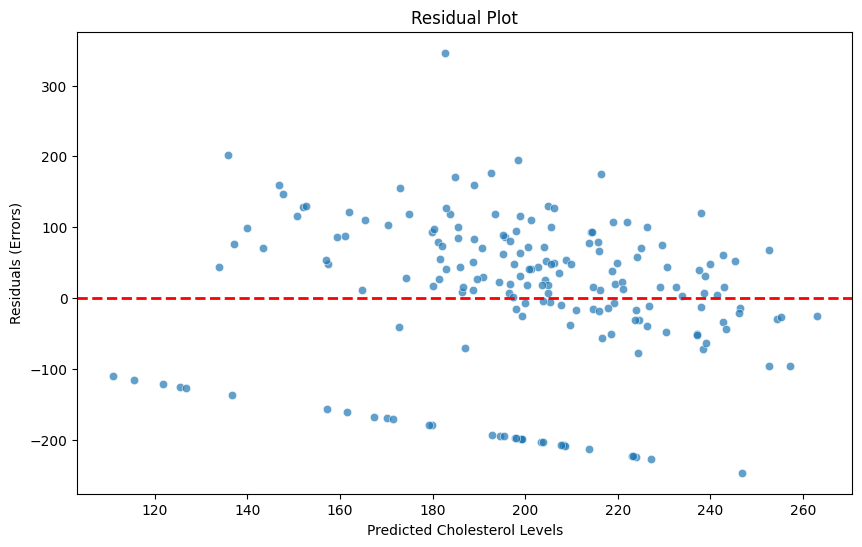

In [51]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Cholesterol Levels')
plt.ylabel('Residuals (Errors)')
plt.show()


In [52]:
coefficients = model.coef_
features = numerical_cols

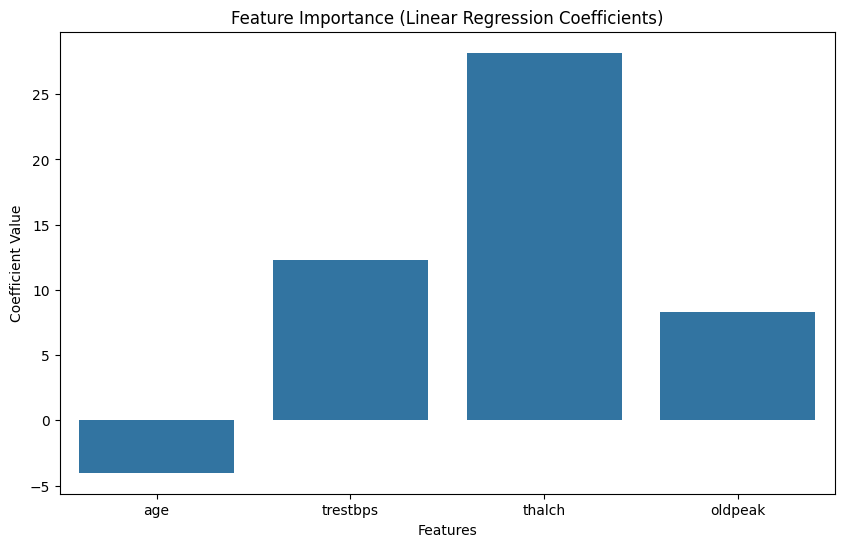

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=coefficients)
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.ylabel('Coefficient Value')
plt.xlabel('Features')
plt.show()

In [54]:
print("\nInsights:")
print(f"- The R^2 score indicates that the model explains {r2:.4f} of the variance in the cholesterol levels.")
print("- A lower mean squared error (MSE) suggests the model is a good fit for the data.")
print("- The feature importance plot shows how much each feature contributes to predicting cholesterol levels.")


Insights:
- The R^2 score indicates that the model explains 0.0154 of the variance in the cholesterol levels.
- A lower mean squared error (MSE) suggests the model is a good fit for the data.
- The feature importance plot shows how much each feature contributes to predicting cholesterol levels.
